# Chapter 9: Support Vector Machines

In [19]:
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(1,10), rep(-1, 10))


In [20]:
x[y==1,]= x[y==1,] +1 

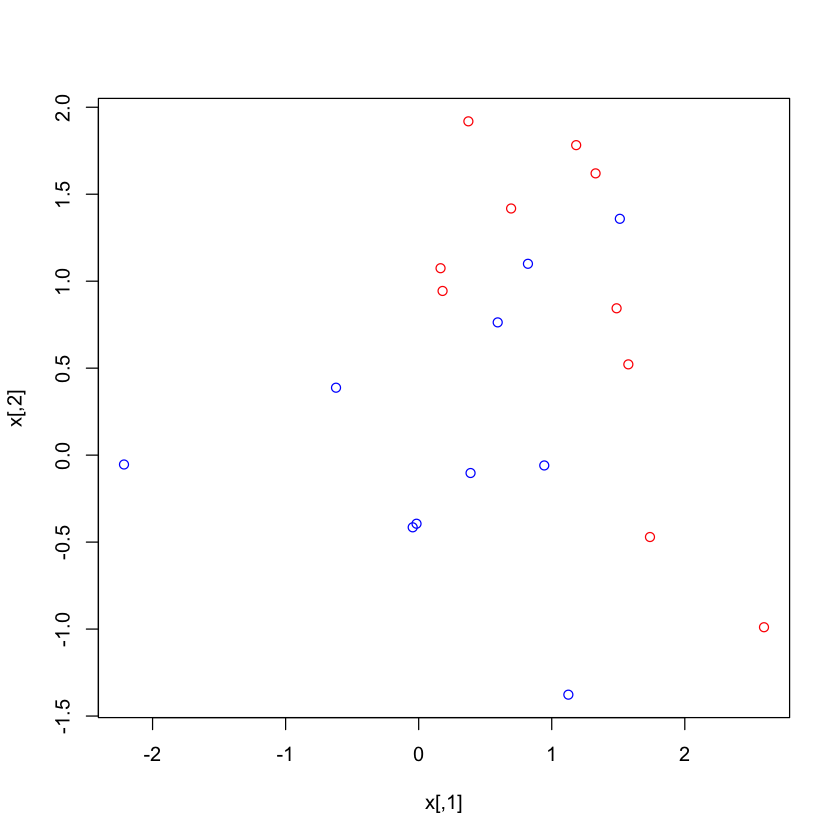

In [21]:
plot(x,col=3-y)

In [22]:
dat = data.frame(x=x, y=as.factor(y))
dat

x.1,x.2,y
0.37354619,1.91897737,1
1.18364332,1.78213630,1
0.16437139,1.07456498,1
2.59528080,-0.98935170,1
1.32950777,1.61982575,1
0.17953162,0.94387126,1
1.48742905,0.84420449,1
1.73832471,-0.47075238,1
1.57578135,0.52184994,1
0.69461161,1.41794156,1


In [23]:
library("e1071")

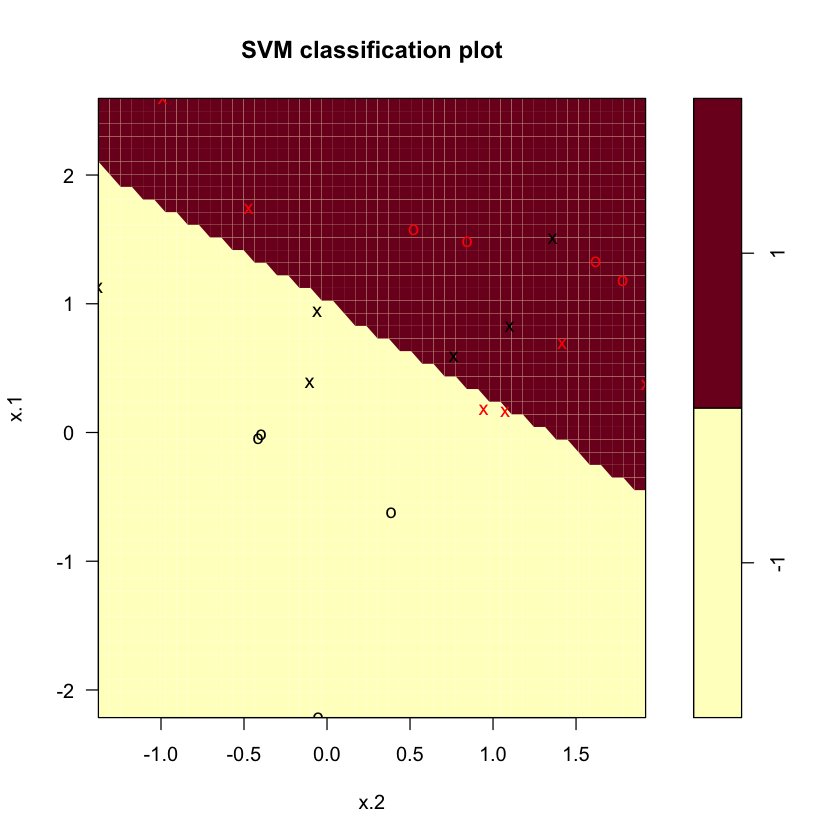

In [24]:
svmfit = svm(y~., data=dat, kernel='linear', cost=5, scale=FALSE)
plot(svmfit, dat)

In [25]:
tune.out = tune(svm, y~., data=dat, kernel='linear', ranges=list(cost=c(0.001,0.01,0.1,1,5,10,100)))

In [26]:
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.25 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.40  0.3944053
4 1e+00  0.25  0.2635231
5 5e+00  0.35  0.3374743
6 1e+01  0.35  0.3374743
7 1e+02  0.35  0.3374743


In [27]:
bestmod = tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  13

 ( 7 6 )


Number of Classes:  2 

Levels: 
 -1 1




In [28]:
xtest = matrix(rnorm(20*2), ncol=2)
ytest = sample(c(-1,1),20, rep=TRUE)
xtest[ytest==1,] = xtest[ytest==1,]+1
testdat=data.frame(x=xtest, y=as.factor(ytest))

In [29]:
ypred = predict(bestmod, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 10  3
     1   1  6

       truth
predict -1  1
     -1 10  3
     1   1  6

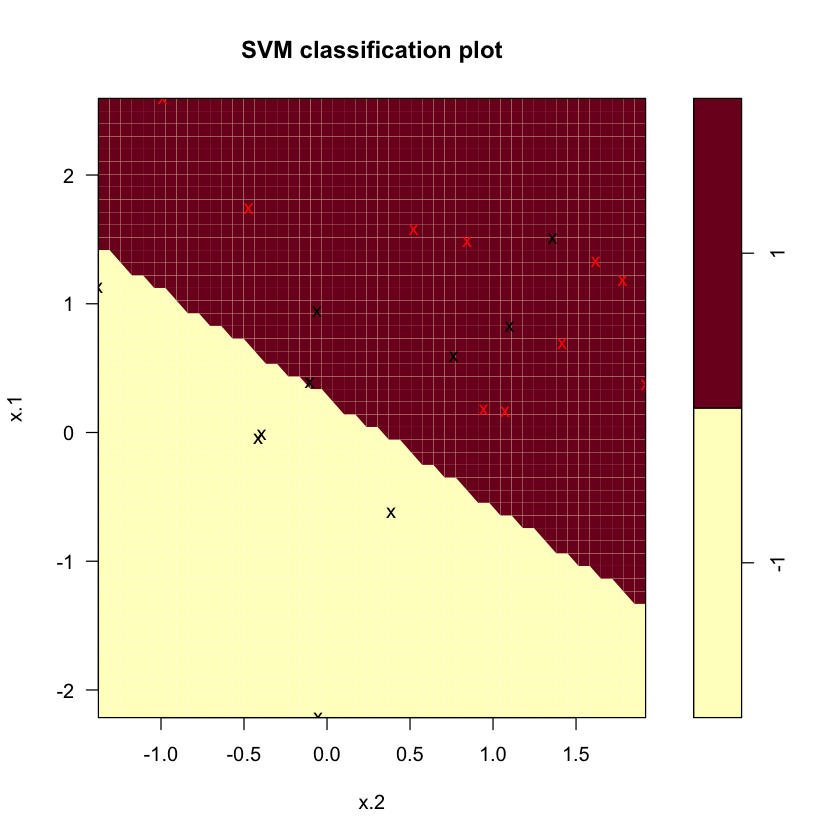

In [30]:
svmfit = svm(y~., data=dat, kernel='linear', cost=0.01, scale=FALSE)
plot(svmfit, dat)
ypred = predict(bestmod, testdat)
table(predict=ypred, truth=testdat$y)

In [43]:
svmfit = svm(y~., data=dat, kernel='linear', cost=0.001, scale=FALSE)
ypred = predict(svmfit, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  5 0
     1   6 9

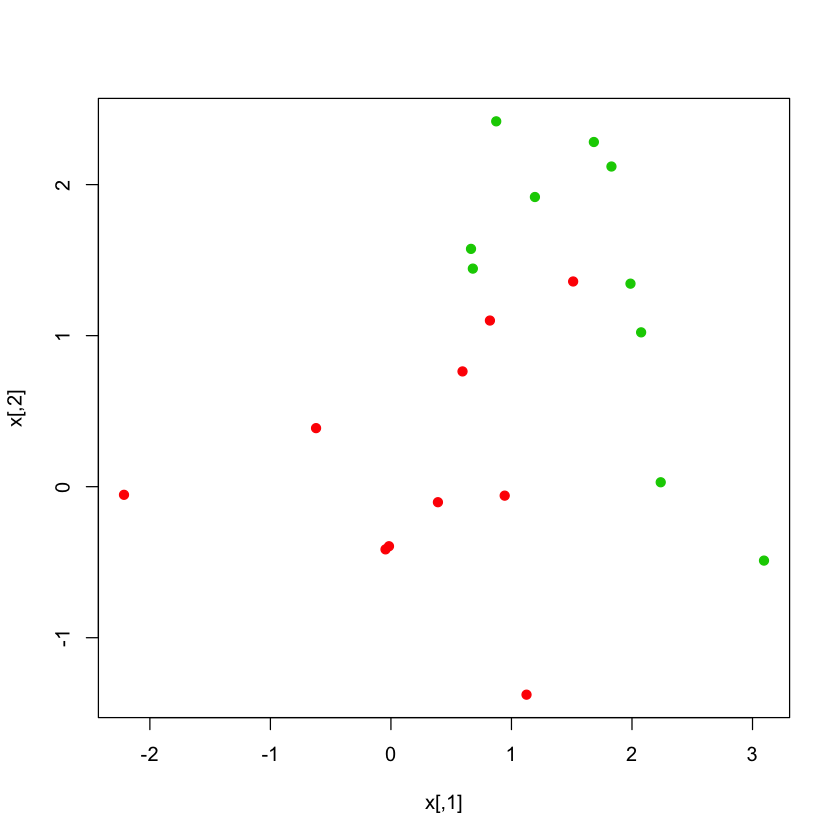

In [44]:
x[y==1,] = x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)

In [48]:
dat=data.frame(x=x,y=as.factor(y))
svmfit = svm(y~., data=dat, kernel='linear', cost=1)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  9

 ( 5 4 )


Number of Classes:  2 

Levels: 
 -1 1




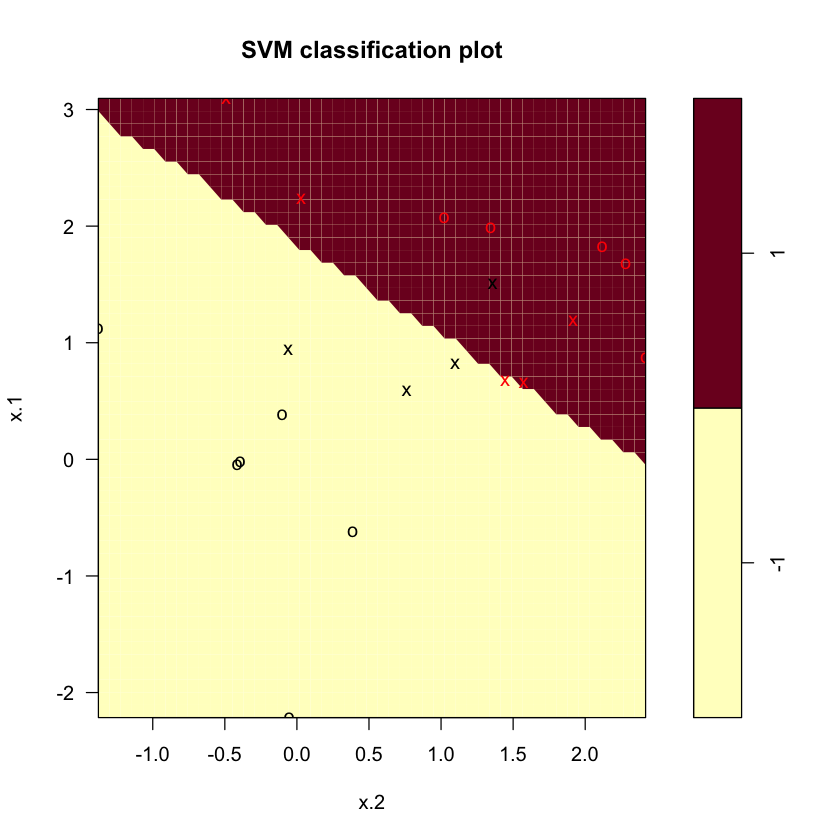

In [49]:
plot(svmfit, dat)

# SVM

In [51]:
set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x, y=as.factor(y))

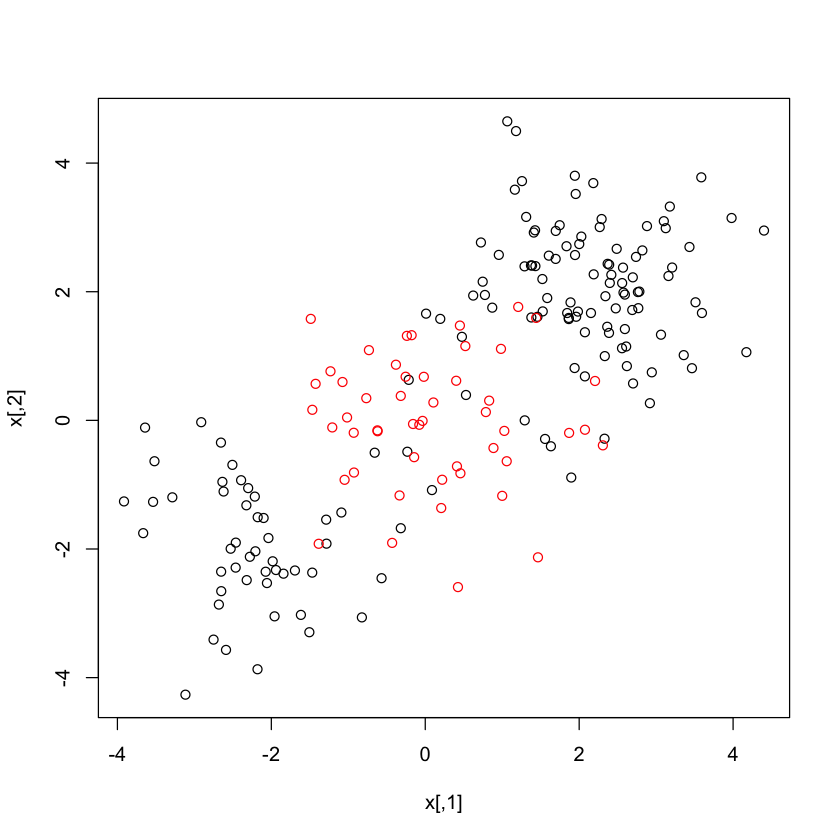

In [52]:
plot(x,col=y)

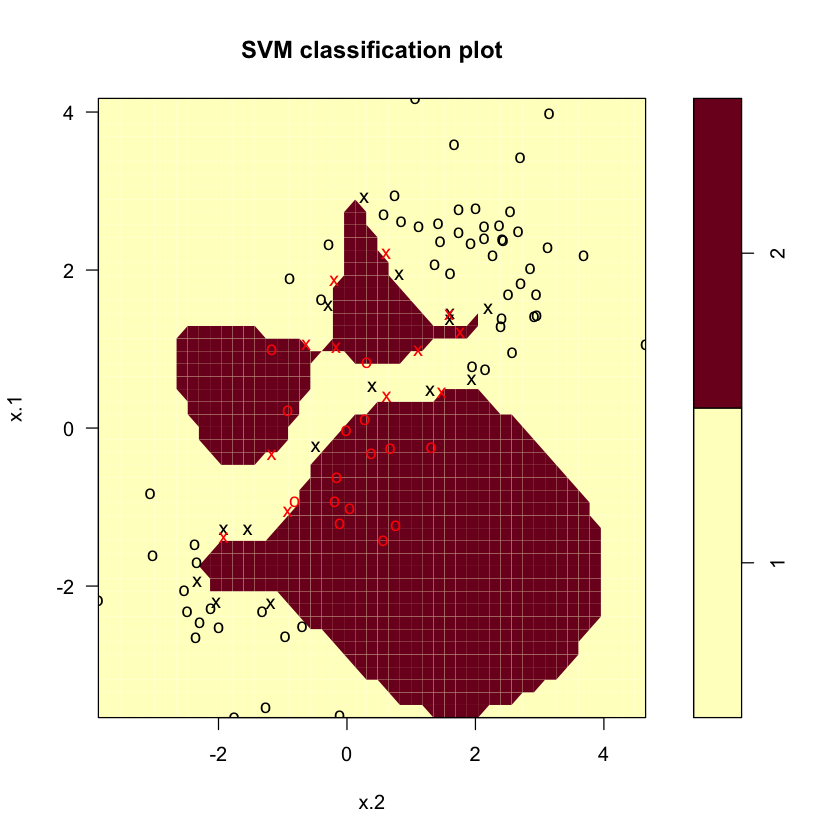

In [56]:
train=sample(200,100)
svmfit=svm(y~., data=dat[train,],kernel="radial",gamma=1, cost=1e5)
plot(svmfit,dat[train,])

In [57]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 
      gamma:  1 

Number of Support Vectors:  27

 ( 15 12 )


Number of Classes:  2 

Levels: 
 1 2




In [61]:
set.seed(1)
tune.out = tune(svm, y~., data=dat[train,], kernel='radial', 
                ranges=list(cost=c(0.1,1,5,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     3

- best performance: 0.1 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.16363917
2  1e+00   0.5  0.11 0.07378648
3  5e+00   0.5  0.12 0.07888106
4  1e+01   0.5  0.12 0.07888106
5  1e+02   0.5  0.16 0.06992059
6  1e+03   0.5  0.18 0.07888106
7  1e-01   1.0  0.24 0.16465452
8  1e+00   1.0  0.11 0.07378648
9  5e+00   1.0  0.11 0.07378648
10 1e+01   1.0  0.13 0.06749486
11 1e+02   1.0  0.16 0.08432740
12 1e+03   1.0  0.20 0.06666667
13 1e-01   2.0  0.27 0.16363917
14 1e+00   2.0  0.13 0.09486833
15 5e+00   2.0  0.14 0.08432740
16 1e+01   2.0  0.15 0.08498366
17 1e+02   2.0  0.19 0.05676462
18 1e+03   2.0  0.23 0.08232726
19 1e-01   3.0  0.27 0.16363917
20 1e+00   3.0  0.10 0.08164966
21 5e+00   3.0  0.14 0.08432740
22 1e+01   3.0  0.16 0.08432740
23 1e+02   3.0  0.20 0.08164966
24 1e+03   3.0  0.24 0.08432740
25 1e-01   4.0  0.27 0.

In [64]:
library("ROCR")
rocplot=function(pred, truth,...){
    predob=prediction(pred,truth)
    perf=performance(predob, "tpr","fpr")
    plot(perf,...)
}

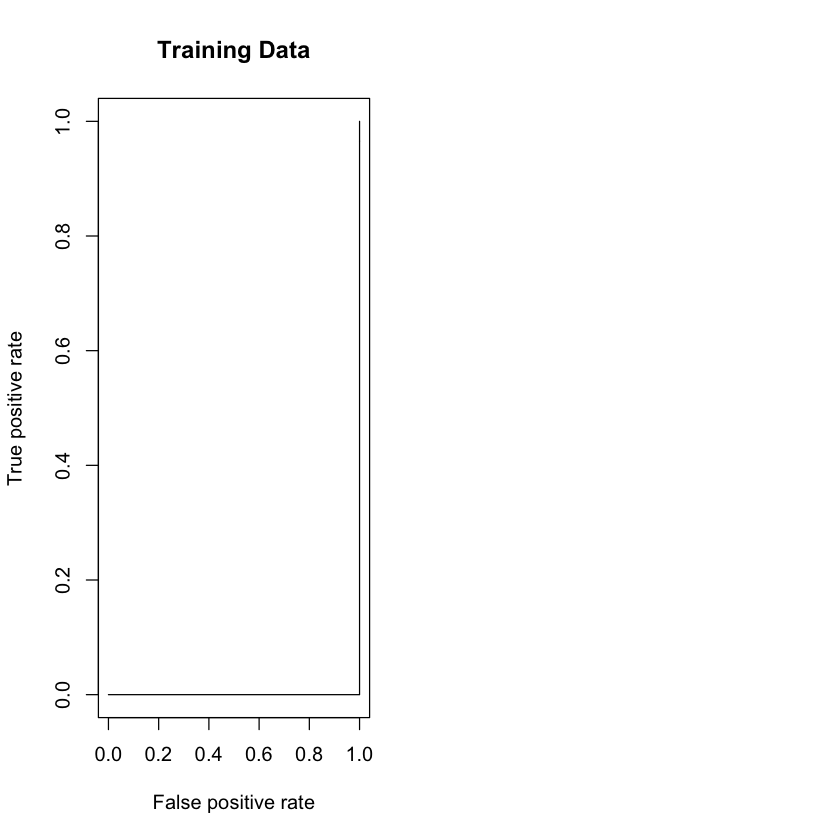

In [69]:
train=sample(200,100)
svmfit.opt=svm(y~., data=dat[train,],kernel="radial",gamma=50, cost=1, decision.values=TRUE)
fitted=attributes(predict(svmfit.opt, dat[train,], decision.values=TRUE))$decision.values
par(mfrow=c(1,2))
rocplot(fitted, dat[train,"y"], main="Training Data")

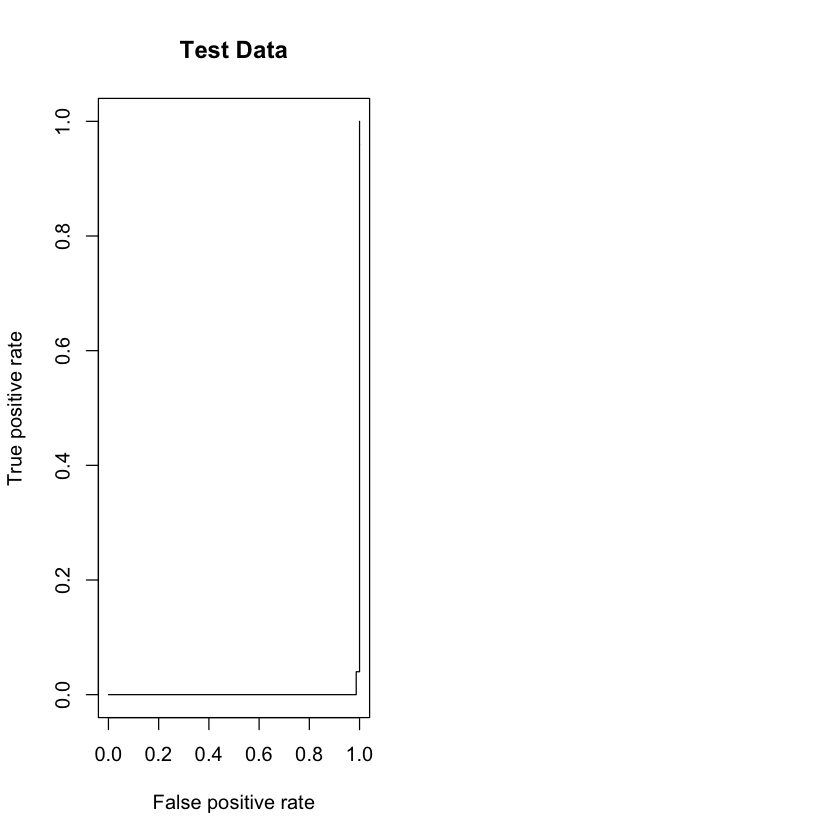

In [73]:
train=sample(200,100)
svmfit.opt=svm(y~., data=dat[-train,],kernel="radial",gamma=50, cost=1, decision.values=TRUE)
fitted=attributes(predict(svmfit.opt, dat[-train,], decision.values=TRUE))$decision.values
par(mfrow=c(1,2))
rocplot(fitted, dat[-train,"y"], main="Test Data")

# Multiclass SVM

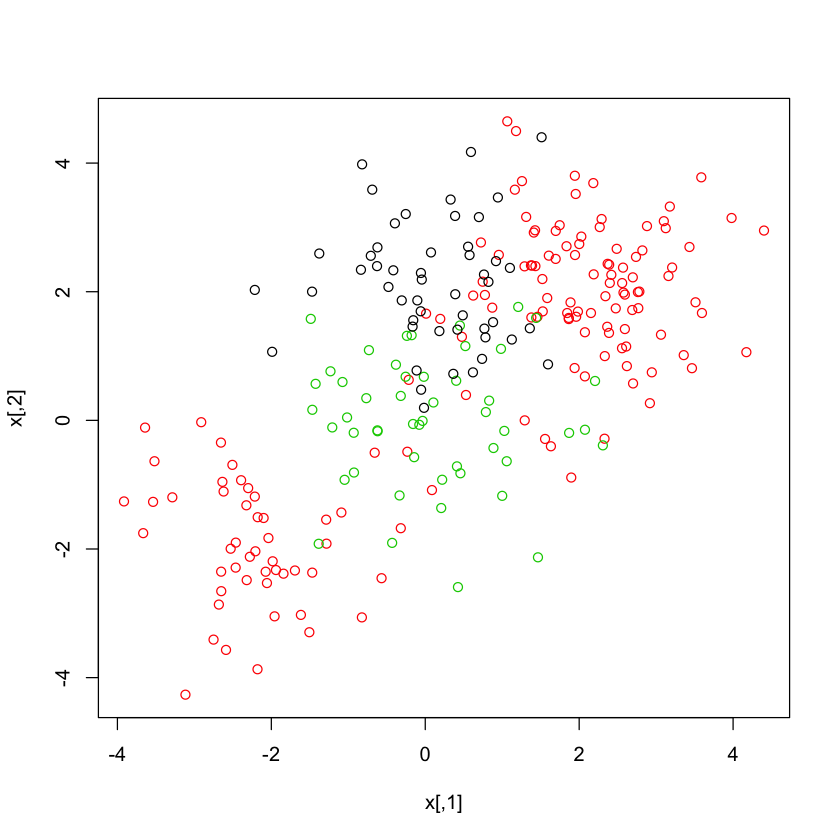

In [74]:
set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y,rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x,col=(y+1))

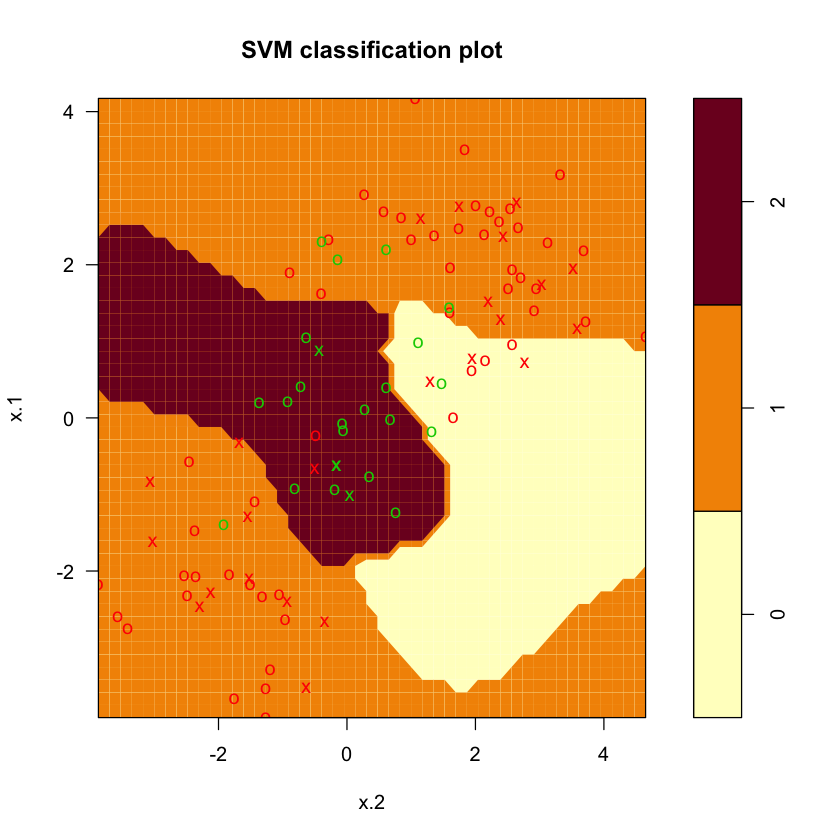

In [75]:
svmfit=svm(y~., data=dat,kernel="radial",gamma=1, cost=10)
plot(svmfit,dat[train,])

# Gene Dataset

In [77]:
library("ISLR")

In [79]:
str(Khan)

List of 4
 $ xtrain: num [1:63, 1:2308] 0.7733 -0.0782 -0.0845 0.9656 0.0757 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:63] "V1" "V2" "V3" "V4" ...
  .. ..$ : NULL
 $ xtest : num [1:20, 1:2308] 0.14 1.164 0.841 0.685 -1.956 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:20] "V1" "V2" "V4" "V6" ...
  .. ..$ : NULL
 $ ytrain: num [1:63] 2 2 2 2 2 2 2 2 2 2 ...
 $ ytest : num [1:20] 3 2 4 2 1 3 4 2 3 1 ...


### Training Data

In [87]:
dat=data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
svmfit=svm(y~., data=dat,kernel="linear",cost=10)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [88]:
table(svmfit$fitted,dat$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

### Test Data

In [90]:
tdat=data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
tpred=predict(svmfit,newdata=tdat)
table(tpred, tdat$y)

     
tpred 1 2 3 4
    1 3 0 0 0
    2 0 6 2 0
    3 0 0 4 0
    4 0 0 0 5